In [18]:
import cv2
import numpy as np
import os
from skimage import io
import matplotlib.pyplot as plt



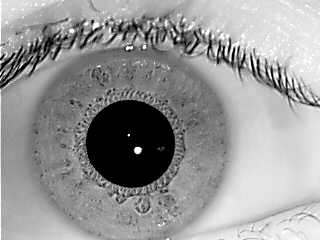

In [19]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('01_L.bmp')

# Display the image
cv2_imshow(image)


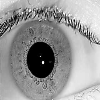

In [20]:
# Resize the image
resized = cv2.resize(image, (100, 100))

# Display the resized image
cv2_imshow(resized)


In [21]:
# Blur the image to reduce noise
blur = cv2.GaussianBlur(resized, (5, 5), 0)

# Use a Canny edge detector to find edges
edges = cv2.Canny(blur, 50, 150)

# Use a Hough circle transform to find circles in the image
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)


In [25]:
circles

array([[40, 52, 32]])

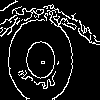

In [22]:
cv2_imshow(edges)

In [23]:
if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        # Find the most appropriate circle (this might depend on your images)
        # Get center coordinates and radius of a circle.
        center_x, center_y, radius = circles[0]

In [29]:
type(radius)

numpy.int64

In [32]:
normalized = cv2.linearPolar(image, (int(center_x), int(center_y)), radius, cv2.WARP_FILL_OUTLIERS)
# Create Gabor filter and apply it to the normalized image
ksize = 31    # Size of the filter
sigma = 4.0   # Standard deviation of the gaussian envelope
theta = np.pi # Orientation of the normal to the parallel stripes of a Gabor function
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.02  # Spatial aspect ratio (ellipticity of the support of the Gabor function)
g_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma)
filtered_img = cv2.filter2D(normalized, cv2.CV_8UC3, g_kernel)


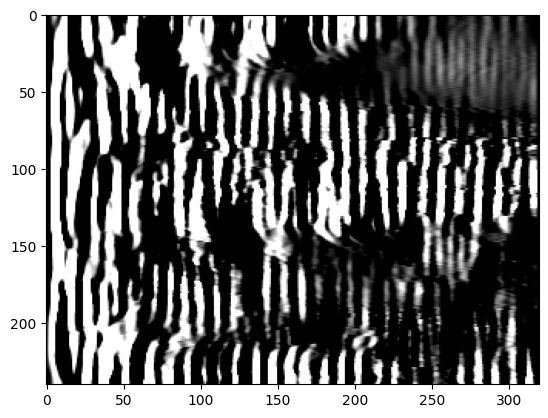

In [34]:
plt.imshow(filtered_img, cmap='gray')


In [35]:
print(filtered_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [36]:
mean = np.mean(filtered_img)
variance = np.var(filtered_img)

feature_string = "Mean: " + str(mean) + ", Variance: " + str(variance)


In [37]:
feature_string

'Mean: 79.95236979166667, Variance: 10902.689424071585'